## Language Popularity, Demand and Growth


Our questions to answer are:
1. How well are languages known by developers?
2. Which Languages want developers to learn next?
3. How big is the difference between which languages developers are working with now and with which languages they would like to work?

For every question we will need the public survey data (https://insights.stackoverflow.com/survey) of 2017. So we load it into a DataFrame.

In [1]:
from pathlib import Path

import pandas as pd


DATA_DIR = Path() / '..' / 'data'
FILE_NAME_2017 = 'survey_results_public_2017.csv'

df_2017 = pd.read_csv(str(DATA_DIR / FILE_NAME_2017))
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1

To answer question 1 we want to compute the percentage of developers per language, who know the language. To do that we will use the fields *Respondent* (as the id) and *HaveWorkedLanguage*. Per language we count how many developers know it and then devide it by the total number of developers/resopndents.

In [2]:
df_q1 = df_2017[['Respondent', 'HaveWorkedLanguage']]
df_q1 = df_q1[df_q1['HaveWorkedLanguage'].notna()]

# Normalize the HaveWorkedLanguage column
df_q1 = df_q1.assign(HaveWorkedLanguage=df_q1['HaveWorkedLanguage'].str.split(';')).explode('HaveWorkedLanguage')
df_q1['HaveWorkedLanguage'] = df_q1['HaveWorkedLanguage'].apply(lambda x: str(x).strip())

counts_per_lang = df_q1['HaveWorkedLanguage'].value_counts()
percentage_per_lang = counts_per_lang / df_q1['Respondent'].nunique()
percentage_per_lang

JavaScript        0.624573
SQL               0.512055
Java              0.396560
C#                0.340642
Python            0.319563
PHP               0.280956
C++               0.222662
C                 0.190416
TypeScript        0.095235
Ruby              0.090758
Swift             0.064655
Objective-C       0.064137
VB.NET            0.062061
Assembly          0.049775
R                 0.044614
Perl              0.043276
VBA               0.042976
Matlab            0.042840
Go                0.042512
Scala             0.035741
Groovy            0.032573
CoffeeScript      0.032546
Visual Basic 6    0.029242
Lua               0.028369
Haskell           0.017720
F#                0.012478
Rust              0.011358
Clojure           0.010676
Elixir            0.010375
Smalltalk         0.008928
Erlang            0.007672
Common Lisp       0.007454
Dart              0.003959
Julia             0.003768
Hack              0.002922
Name: HaveWorkedLanguage, dtype: float64

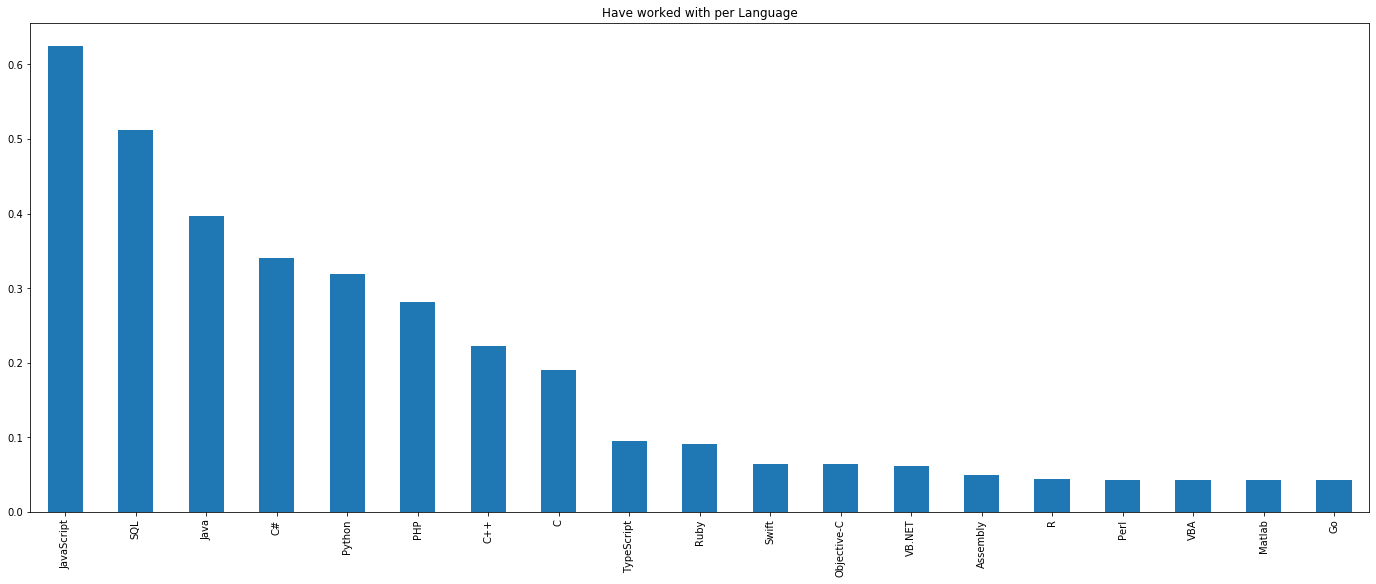

In [3]:
# We just plot the languages which are known by at least 4% of the respondents
percentage_per_lang[percentage_per_lang >= 0.04].plot.bar(
    x='Language',
    title='Have worked with per Language',
    figsize=(24, 9))#.get_figure().savefig("lang_pop.png", dpi=600)


### Question 2

To answer question 2 we want to compute the percentage of developers per language, who want to work with the language next year. To do that we will use the fields *Respondent* (as the id) and *WantWorkLanguage*. Per language we count how many developers want to work with it and then devide it by the total number of developers/resopndents.

In [4]:
df_q2 = df_2017[['Respondent', 'WantWorkLanguage']]
df_q2 = df_q2[df_q2['WantWorkLanguage'].notna()]

# Normalize the HaveWorkedLanguage column
df_q2 = df_q2.assign(WantWorkLanguage=df_q2['WantWorkLanguage'].str.split(';')).explode('WantWorkLanguage')
df_q2['WantWorkLanguage'] = df_q2['WantWorkLanguage'].apply(lambda x: str(x).strip())

counts_want_per_lang = df_q2['WantWorkLanguage'].value_counts()
percentage_want_per_lang = counts_want_per_lang / df_q2['Respondent'].nunique()
percentage_want_per_lang

JavaScript        0.483462
Python            0.372213
SQL               0.332149
C#                0.301649
Java              0.295757
C++               0.226437
Go                0.170857
TypeScript        0.168547
PHP               0.158864
C                 0.143348
Swift             0.134139
Ruby              0.117438
Scala             0.092446
Rust              0.080483
R                 0.077818
Haskell           0.068283
F#                0.060229
Assembly          0.056942
Objective-C       0.054603
Elixir            0.046342
Clojure           0.038731
Lua               0.033076
Perl              0.032247
Erlang            0.031181
CoffeeScript      0.030559
Matlab            0.027568
Groovy            0.025643
VB.NET            0.023807
Common Lisp       0.019158
Julia             0.015250
Dart              0.014687
VBA               0.013177
Smalltalk         0.012466
Hack              0.010009
Visual Basic 6    0.008735
Name: WantWorkLanguage, dtype: float64

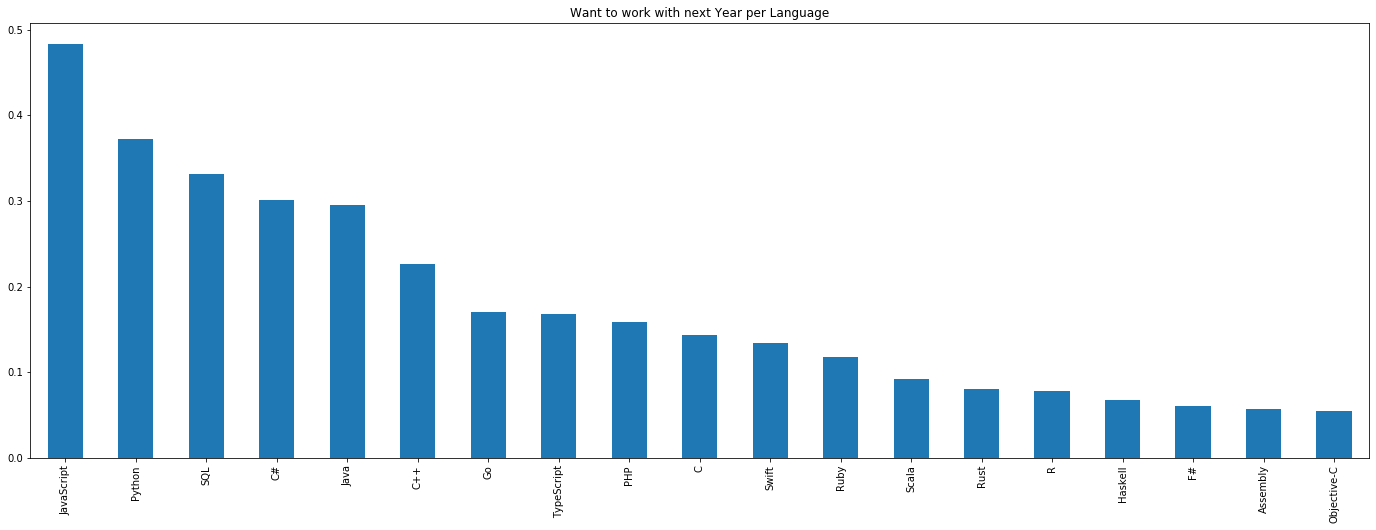

In [5]:
# We just plot the languages with which at least 5% of the respondents want to work with next year
percentage_want_per_lang[percentage_want_per_lang >= 0.05].plot.bar(
    x='Language',
    title='Want to work with next Year per Language',
    figsize=(24, 8))#.get_figure().savefig("lang_want.png", dpi=600)


### Question 3

To answer question 3 we use our results from question 1 and question 2 and compute the difference between the *WantWorkLanguage* data and the *HaveWorkedLanguage* data.

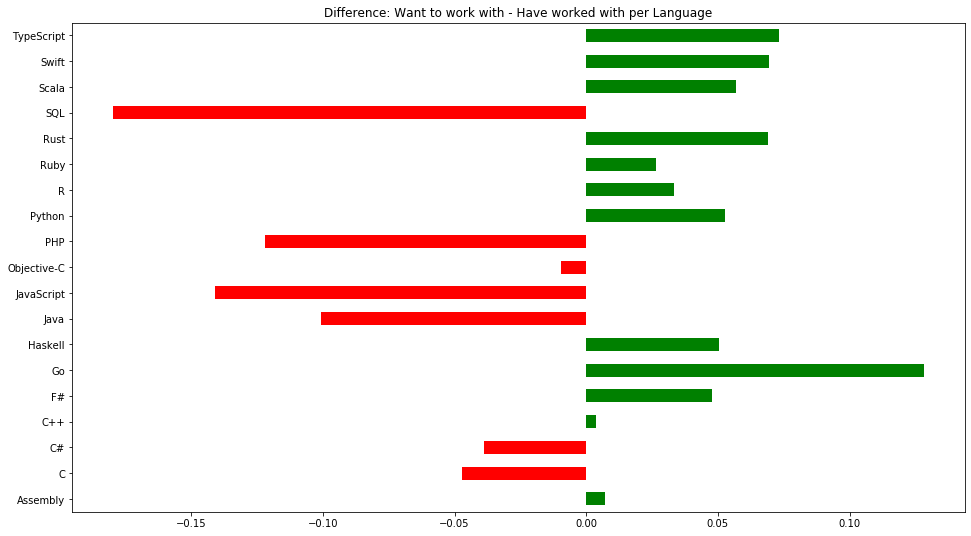

In [6]:
diff_have_want = (percentage_want_per_lang[percentage_want_per_lang >= 0.05] - percentage_per_lang).dropna()
diff_have_want.plot.barh(
    x='Language',
    color =(diff_have_want > 0).map({True: 'g',
                                     False: 'r'}),
    title='Difference: Want to work with - Have worked with per Language',
    figsize=(16, 9))#.get_figure().savefig("diff_want_have.png", dpi=600)
